# Problem statement (Term Deposit Sale)
Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

#Deliverable – 1 (Exploratory data quality report reflecting the following) – (10)
1. Univariate analysis
a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
2. Multivariate analysis
a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
3. Strategies to address the different data challenges such as data pollution, outliers and missing values.

In [153]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
sns.set(style = 'darkgrid')
from IPython.display import HTML, display
from IPython.core import display as ICD
from pandas.plotting import scatter_matrix
pd.options.display.max_columns = None
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from scipy.stats import chi2_contingency
import warnings
import scikitplot as skplt
warnings.filterwarnings('ignore')

#import machine learning
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.feature_extraction.text import CountVectorizer  
#DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system


warnings.filterwarnings("ignore")

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

In [154]:
bank_df = pd.read_csv("bank-full.csv")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [60]:
bank_df.shape

(43193, 12)

In [3]:
# number of rows in dataset

print("Bank marketing dataset consists of {rows} rows.".format(rows = len(bank_df)))

Bank marketing dataset consists of 45211 rows.


In [4]:
#find percentage of missing values for each column
missing_values = bank_df.isnull().mean()*100

print("Bank marketing dataset consists of {missing_values} missing values.".format(missing_values = missing_values.sum()))

Bank marketing dataset consists of 0.0 missing values.


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [61]:
print("Data:", bank_df.mean()) 

Data: age           40.764082
balance     1354.027342
campaign       2.758178
previous       0.584863
dtype: float64


In [95]:
print(bank_df['age'].mode())

0    32
dtype: int64


In [65]:
print("Data:", bank_df.median())

Data: age          39.0
balance     442.0
campaign      2.0
previous      0.0
dtype: float64


In [66]:
print("Data_quantile(25%):", bank_df.quantile(q=0.25)) 

Data_quantile(25%): age         33.0
balance     71.0
campaign     1.0
previous     0.0
Name: 0.25, dtype: float64


In [67]:
print("Data_quantile(50%):", bank_df.quantile(q=0.50)) 

Data_quantile(50%): age          39.0
balance     442.0
campaign      2.0
previous      0.0
Name: 0.5, dtype: float64


In [68]:
print("Data_quantile(75%):", bank_df.quantile(q=0.75)) 

Data_quantile(75%): age           48.0
balance     1412.0
campaign       3.0
previous       0.0
Name: 0.75, dtype: float64


Mean:  40.93621021432837 
Median:  39.0 
Mode:  32


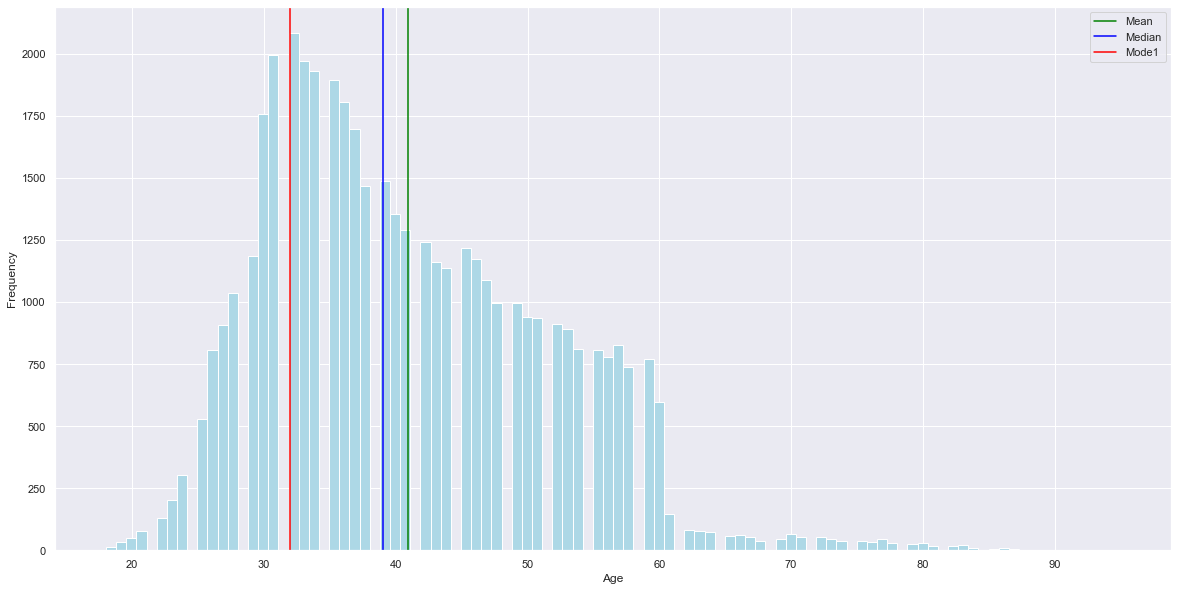

In [97]:
mean=bank_df['age'].mean()
median=bank_df['age'].median()
mode=bank_df['age'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(20,10)) # set the figure size
plt.hist(bank_df['age'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')

plt.xlabel('Age')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()
warnings.filterwarnings('ignore')

In [99]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [107]:
bank_df["balance"].quantile(0.75) - bank_df["balance"].quantile(0.25)

1356.0

Text(0.7, 1354, 'IQR')

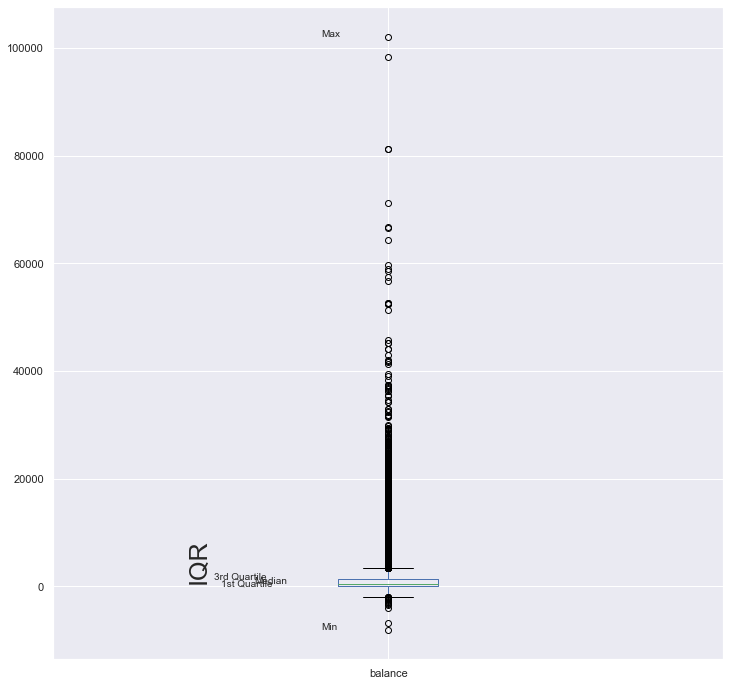

In [118]:
bank_df.boxplot(column="balance",return_type='axes',figsize=(12,12))

plt.text(x=0.74, y=1412.00, s="3rd Quartile")
plt.text(x=0.8, y=442.00, s="Median")
plt.text(x=0.75, y=71.00, s="1st Quartile")
plt.text(x=0.9, y=-8019.00, s="Min")
plt.text(x=0.9, y=102127.00, s="Max")
plt.text(x=0.7, y=1354, s="IQR", rotation=90, size=25)

# we can observe from above graph that there are too many extreme values / outliers

In [119]:
bank_df.cov() 

,age,balance,day,duration,campaign,pdays,previous
age,112.758107,3.161477e+03,-0.805979,-12.711716,0.156601,-25.260550,0.031512
balance,3161.476700,9.270599e+06,114.095467,16905.750545,-137.513232,1047.321715,116.939527
day,-0.805979,1.140955e+02,69.263609,-64.740317,4.189519,-77.535404,-0.991307
duration,-12.711716,1.690575e+04,-64.740317,66320.574090,-67.471794,-40.349073,0.713654
campaign,0.156601,-1.375132e+02,4.189519,-67.471794,9.597733,-27.492386,-0.234459
pdays,-25.260550,1.047322e+03,-77.535404,-40.349073,-27.492386,10025.765774,104.899902
previous,0.031512,1.169395e+02,-0.991307,0.713654,-0.234459,104.899902,5.305841


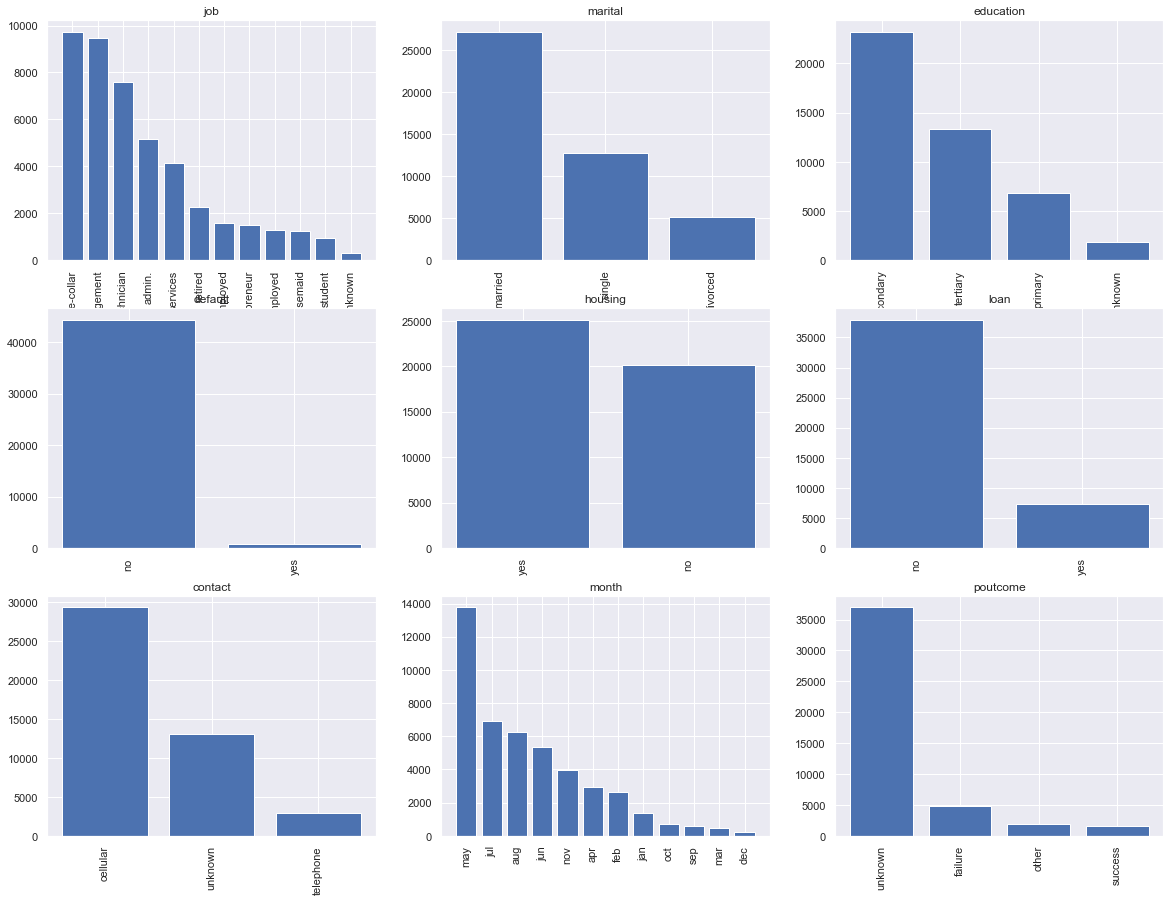

In [105]:
#Categorical columns exploration

cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = bank_df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

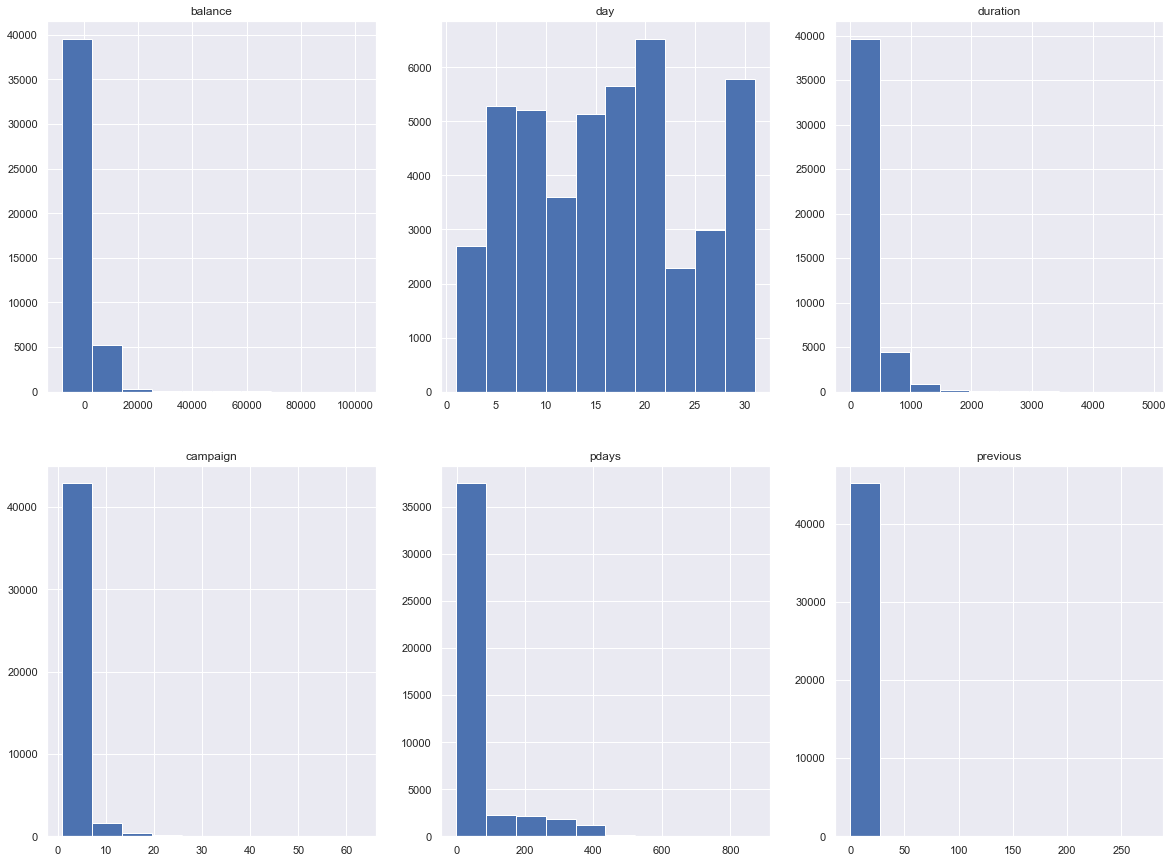

In [7]:
#Numerical columns exploration

num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(bank_df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [8]:
bank_df[['balance', 'day', 'duration', 'pdays', 'campaign', 'previous']].describe()

,balance,day,duration,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,15.806419,258.163080,40.197828,2.763841,0.580323
std,3044.765829,8.322476,257.527812,100.128746,3.098021,2.303441
min,-8019.000000,1.000000,0.000000,-1.000000,1.000000,0.000000
25%,72.000000,8.000000,103.000000,-1.000000,1.000000,0.000000
50%,448.000000,16.000000,180.000000,-1.000000,2.000000,0.000000
75%,1428.000000,21.000000,319.000000,-1.000000,3.000000,0.000000
max,102127.000000,31.000000,4918.000000,871.000000,63.000000,275.000000


In [9]:
#Some numerical columns have outliers especially 'pdays', 'campaign' and 'previous' columns. 

In [10]:
#%age of 'pdays' values above 400

len (bank_df[bank_df['pdays'] > 400] ) / len(bank_df) * 100

0.5175731569750724

In [11]:
#%age of 'campaign' values above 20

len (bank_df[bank_df['campaign'] > 20] ) / len(bank_df) * 100

0.5396916679569131

In [12]:
#%age of 'previous' values above 15

len (bank_df[bank_df['previous'] > 15] ) / len(bank_df) * 100

0.23887991860387958

In [13]:
# 0.52% of pdays, 0.54% of campaign & 0.24% pf previous values seem to be outliers and need to be imputed

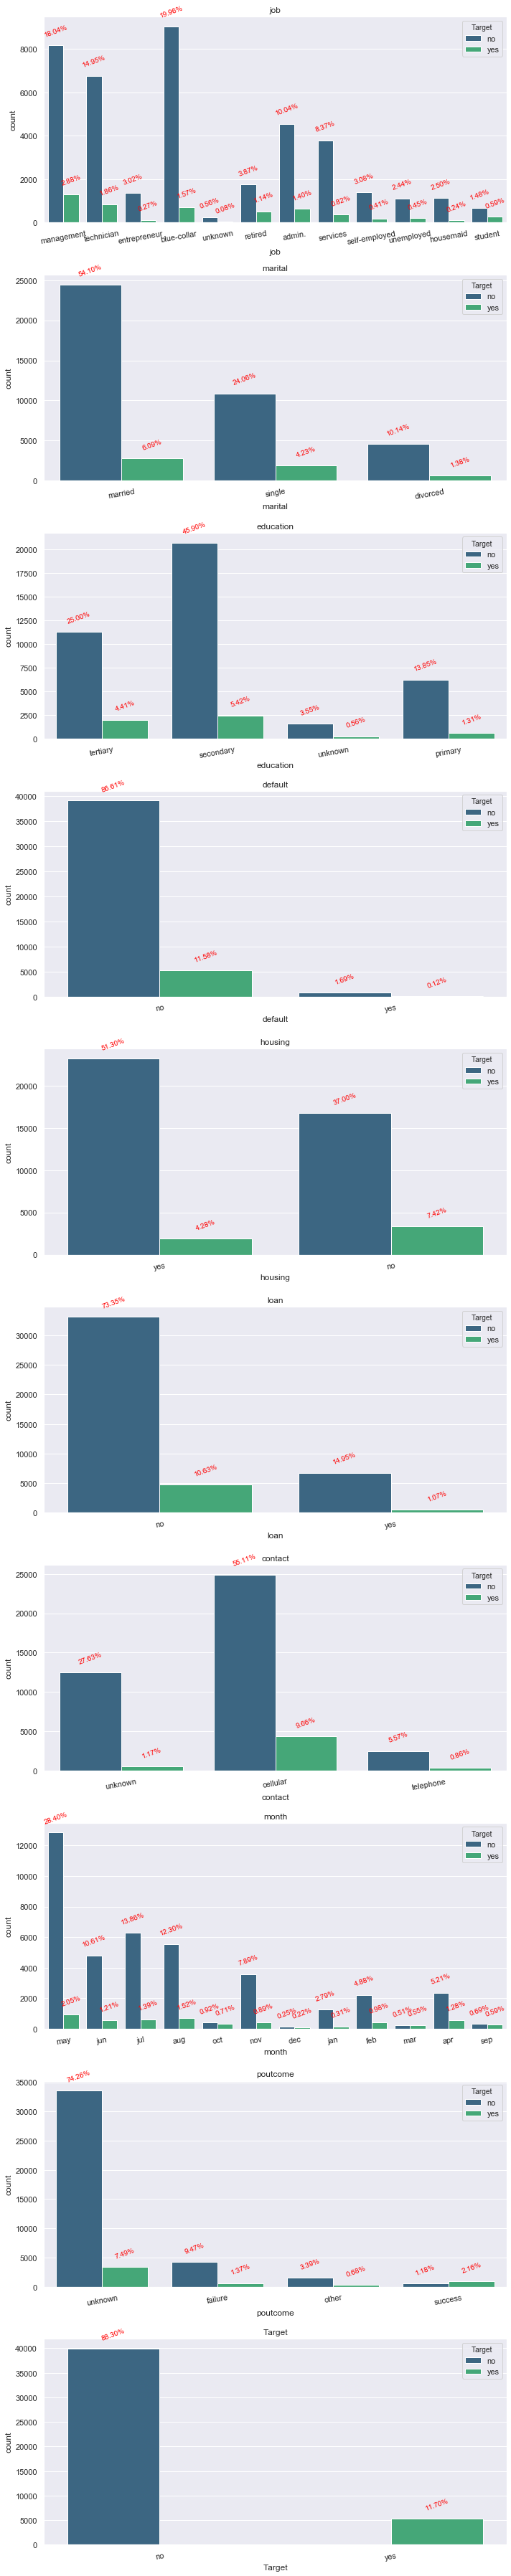

In [14]:
#Further univariate Analysis

objs = bank_df.select_dtypes('object')
objs = objs.dropna()
fig, ax = plt.subplots(10, 1, figsize=(10,50))
for i, obj in enumerate(objs):
    sns.countplot(obj, data=bank_df, hue='Target', orient='vertical', ax=ax[i], palette='viridis')
    for p in ax[i].patches:
        y=p.get_bbox().get_points()[1,1]
        ax[i].annotate('{:1.2f}%'.format(100.*y/bank_df[obj].count()), (p.get_x()+0.2, p.get_height()+20), 
            ha='center', va='bottom',fontsize=10, color='red', rotation=20, xytext=(0, 10),
         textcoords='offset points') # set the alignment of the text

    ax[i].tick_params(axis='x', rotation=10)
    ax[i].set_title(obj)
    plt.tight_layout()

In [15]:
#Based on above plots following assumptions can be made:
#more than 70% of the jobs belong to management, blue-collar, technician, admin, services and our maximum returns comes from this section only
#less than 14% are divorced with negligible returns, hence, married and single may be concatenated 
#people with atleast secondary or higher levels of education have resulted favourable
#people not having loan seem to be favourable
#almost 67% people were contacted over cellular and 9.66% success rate comes from the people who were contacted via cellular
#more contacts were made in summer months, which shows us a direction that instead of taking 12 months, we can divide this into seasons. i.e summer, winter and spring
#in poutcome, almost 84% are nonexistent in the records, that is 84% are new poeple, we can again segment people based on new or old customers 
#unknowns corresponds to nulls, which are only few, so we can bear the loss of dropping nulls
#illiterate in education is very rare (depending on the data), so we'll drop this
#Nulls in education can be imputed.
#housing and loans has same amount of nulls
#day of week is not showing any new information, so we'll drop this
#our data is highly imbalanced
#default is highly imbalanced, and has nulls, let's drop this too

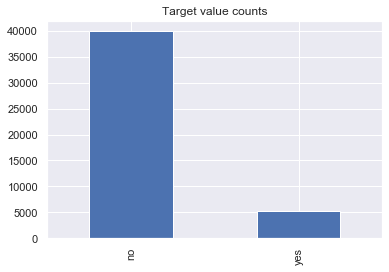

In [16]:
#Bivariate analysis

value_counts = bank_df['Target'].value_counts()
value_counts.plot.bar(title = 'Target value counts')

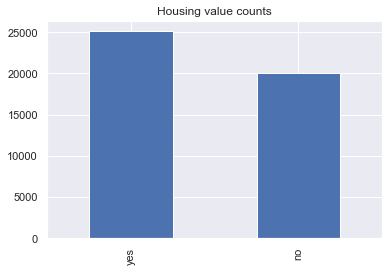

In [17]:
value_counts = bank_df['housing'].value_counts()
value_counts.plot.bar(title = 'Housing value counts')

In [18]:
# Housing column 'yes' & 'no' counts are pretty close. So, we can use accuracy as a metric for predicting campaign outcome regarding term deposit. Hence, each categorical variable can be checked against the housing column. 

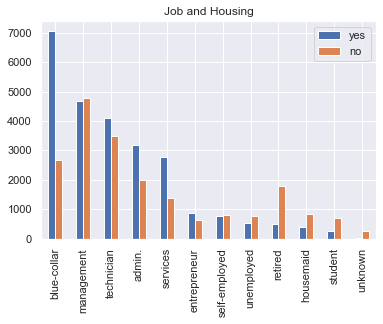

In [19]:
#job and housing

j_df = pd.DataFrame()

j_df['yes'] = bank_df[bank_df['housing'] == 'yes']['job'].value_counts()
j_df['no'] = bank_df[bank_df['housing'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and Housing')

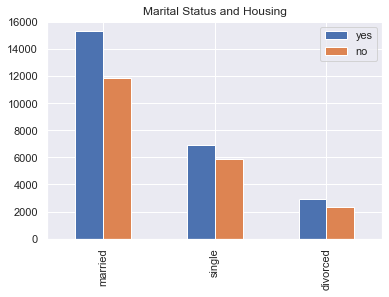

In [20]:
#marital and housing

m_df = pd.DataFrame()

m_df['yes'] = bank_df[bank_df['housing'] == 'yes']['marital'].value_counts()
m_df['no'] = bank_df[bank_df['housing'] == 'no']['marital'].value_counts()

m_df.plot.bar(title = 'Marital Status and Housing')

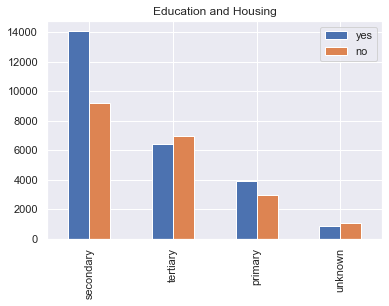

In [21]:
#education and housing

e_df = pd.DataFrame()

e_df['yes'] = bank_df[bank_df['housing'] == 'yes']['education'].value_counts()
e_df['no'] = bank_df[bank_df['housing'] == 'no']['education'].value_counts()

e_df.plot.bar(title = 'Education and Housing')

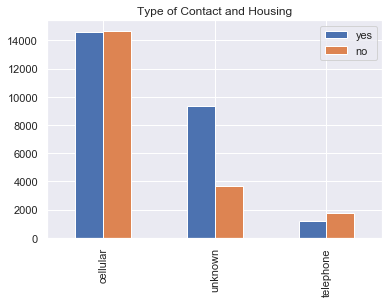

In [22]:
#contact and housing

c_df = pd.DataFrame()

c_df['yes'] = bank_df[bank_df['housing'] == 'yes']['contact'].value_counts()
c_df['no'] = bank_df[bank_df['housing'] == 'no']['contact'].value_counts()

c_df.plot.bar(title = 'Type of Contact and Housing')

In [23]:
#Categorical column correlation:
#Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.
#Married customers are less likely to subscribe for term deposit.
#Customers with 'secondary' education are less likely to subscribe for term deposit.
#Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

In [24]:
#balance and housing

b_df = pd.DataFrame()
b_df['balance_yes'] = (bank_df[bank_df['housing'] == 'yes'][['housing','balance']].describe())['balance']
b_df['balance_no'] = (bank_df[bank_df['housing'] == 'no'][['housing','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,25130.000000,20081.000000
mean,1175.103064,1596.501270
std,2483.285761,3613.405339
min,-4057.000000,-8019.000000
25%,62.000000,85.000000
50%,412.000000,507.000000
75%,1257.750000,1708.000000
max,58544.000000,102127.000000


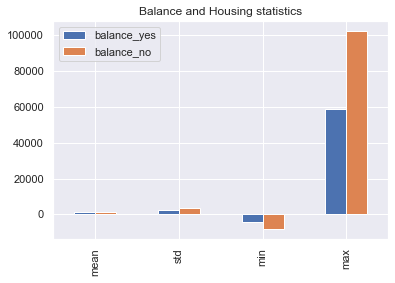

In [25]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and Housing statistics')

In [26]:
#age and housing

a_df = pd.DataFrame()
a_df['age_yes'] = (bank_df[bank_df['housing'] == 'yes'][['housing','age']].describe())['age']
a_df['age_no'] = (bank_df[bank_df['housing'] == 'no'][['housing','age']].describe())['age']

a_df

,age_yes,age_no
count,25130.000000,20081.000000
mean,39.175288,43.139883
std,8.926807,12.058696
min,20.000000,18.000000
25%,32.000000,33.000000
50%,38.000000,42.000000
75%,45.000000,52.000000
max,78.000000,95.000000


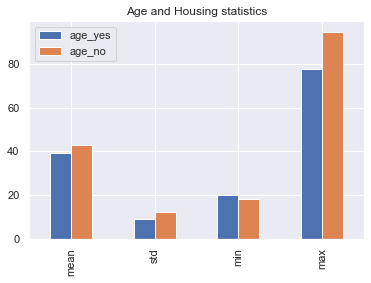

In [27]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and Housing statistics')

In [28]:
#campaigns and housing

c_df = pd.DataFrame()
c_df['campaign_yes'] = (bank_df[bank_df['housing'] == 'yes'][['housing','campaign']].describe())['campaign']
c_df['campaign_no'] = (bank_df[bank_df['housing'] == 'no'][['housing','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,25130.000000,20081.000000
mean,2.698488,2.845625
std,3.140979,3.041508
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,63.000000,41.000000


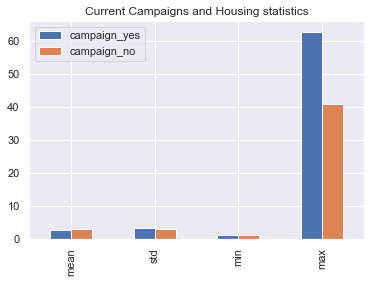

In [29]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Current Campaigns and Housing statistics')

In [30]:
#previous and housing

p_df = pd.DataFrame()
p_df['previous_yes'] = (bank_df[bank_df['housing'] == 'yes'][['housing','previous']].describe())['previous']
p_df['previous_no'] = (bank_df[bank_df['housing'] == 'no'][['housing','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,25130.000000,20081.000000
mean,0.656665,0.484787
std,2.707428,1.660227
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,275.000000,37.000000


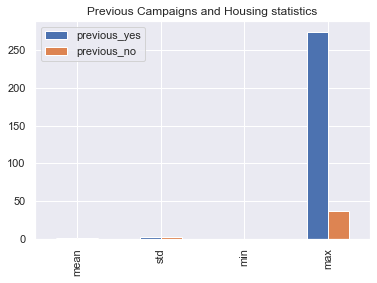

In [31]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Previous Campaigns and Housing statistics')

In [32]:
#Numerical column correlation: 
#People who subscribed for term deposit tend to have greater balance and age values.
#People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

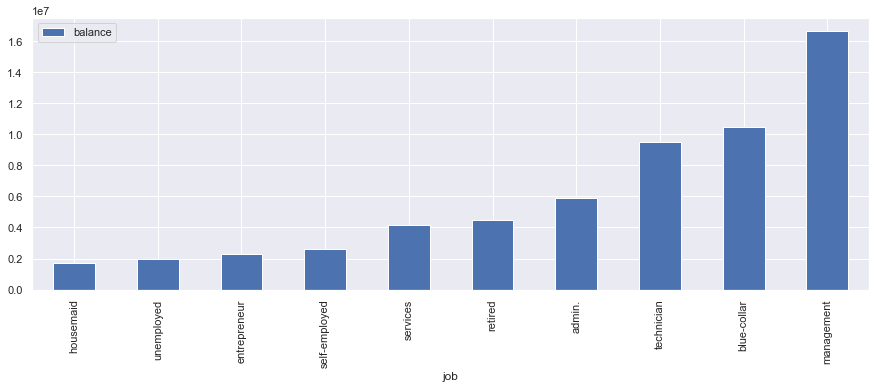

In [141]:
bank_df.groupby(by=['job'])['balance'].sum().reset_index().sort_values(['balance']).tail(10).plot(x='job', y='balance', kind='bar', figsize=(15,5))
plt.show()

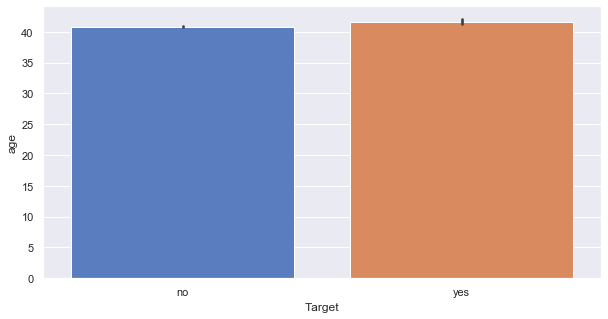

In [146]:
plt.figure(figsize=(10,5)) 
ax = sns.barplot(x='Target', y='age', data=bank_df, palette='muted')

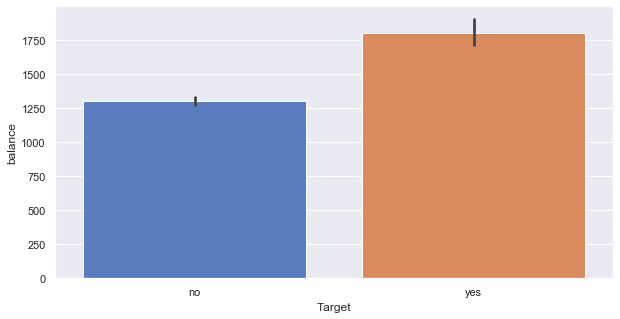

In [147]:
plt.figure(figsize=(10,5)) 
ax = sns.barplot(x='Target', y='balance', data=bank_df, palette='muted')

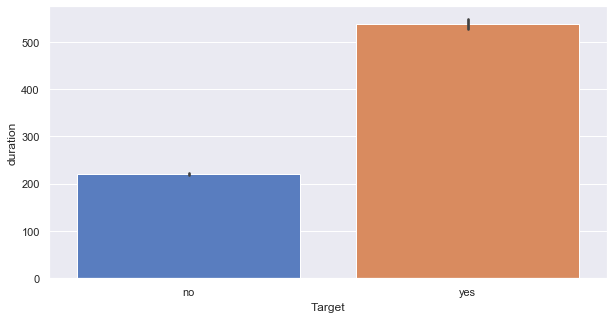

In [148]:
plt.figure(figsize=(10,5)) 
ax = sns.barplot(x='Target', y='duration', data=bank_df, palette='muted')

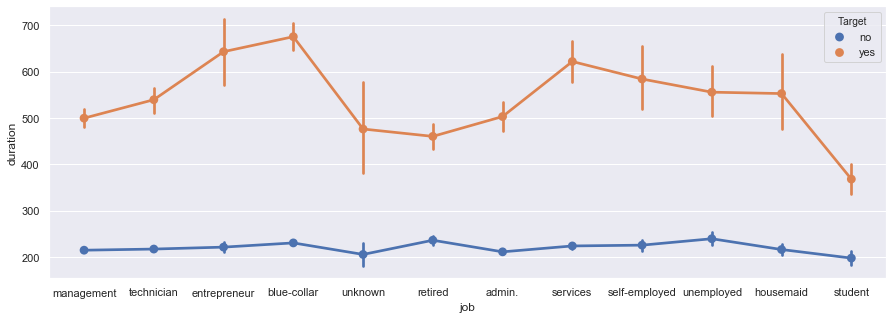

In [158]:
plt.figure(figsize=(15,5))

sns.pointplot(x="job", y="duration", hue = 'Target',  data=bank_df)
plt.show()

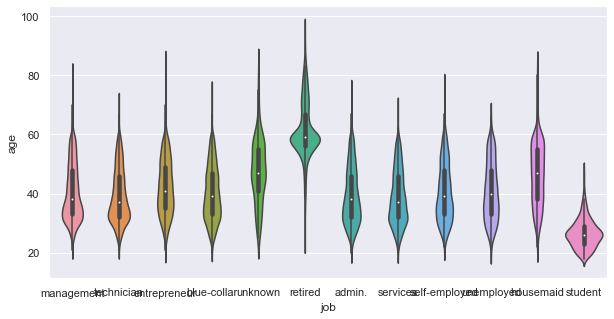

In [159]:
plt.figure(figsize=(10,5))
sns.violinplot(x=bank_df.job, y=bank_df['age'])
plt.show()

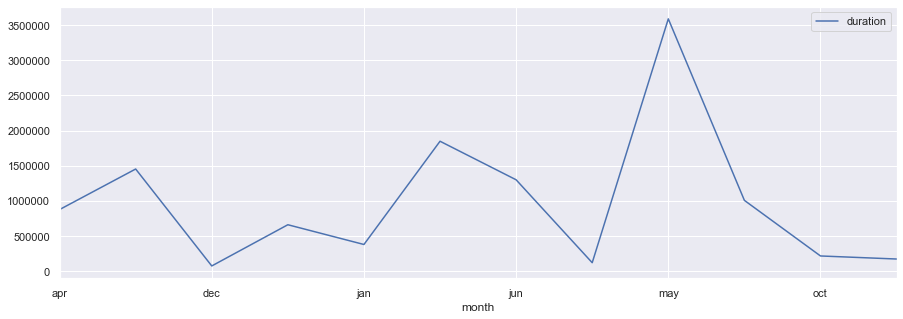

In [166]:
bank_df[['month','duration']].groupby(['month']).sum().plot(figsize=(15,5))

plt.show()

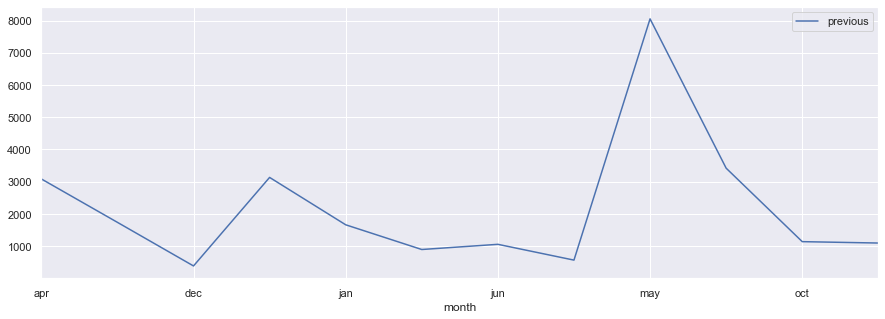

In [167]:
bank_df[['month','previous']].groupby(['month']).sum().plot(figsize=(15,5))

plt.show()

#Positive results yielded with longer duration and higher balance
#Age doesn't matter
#Management, blue-collar and technician with higher balance seem to be positive targets 
#Entrepreneur, blue-collar and services have turned positive with longer duration
#There is not much of difference between previous contact and current campaign season-wise

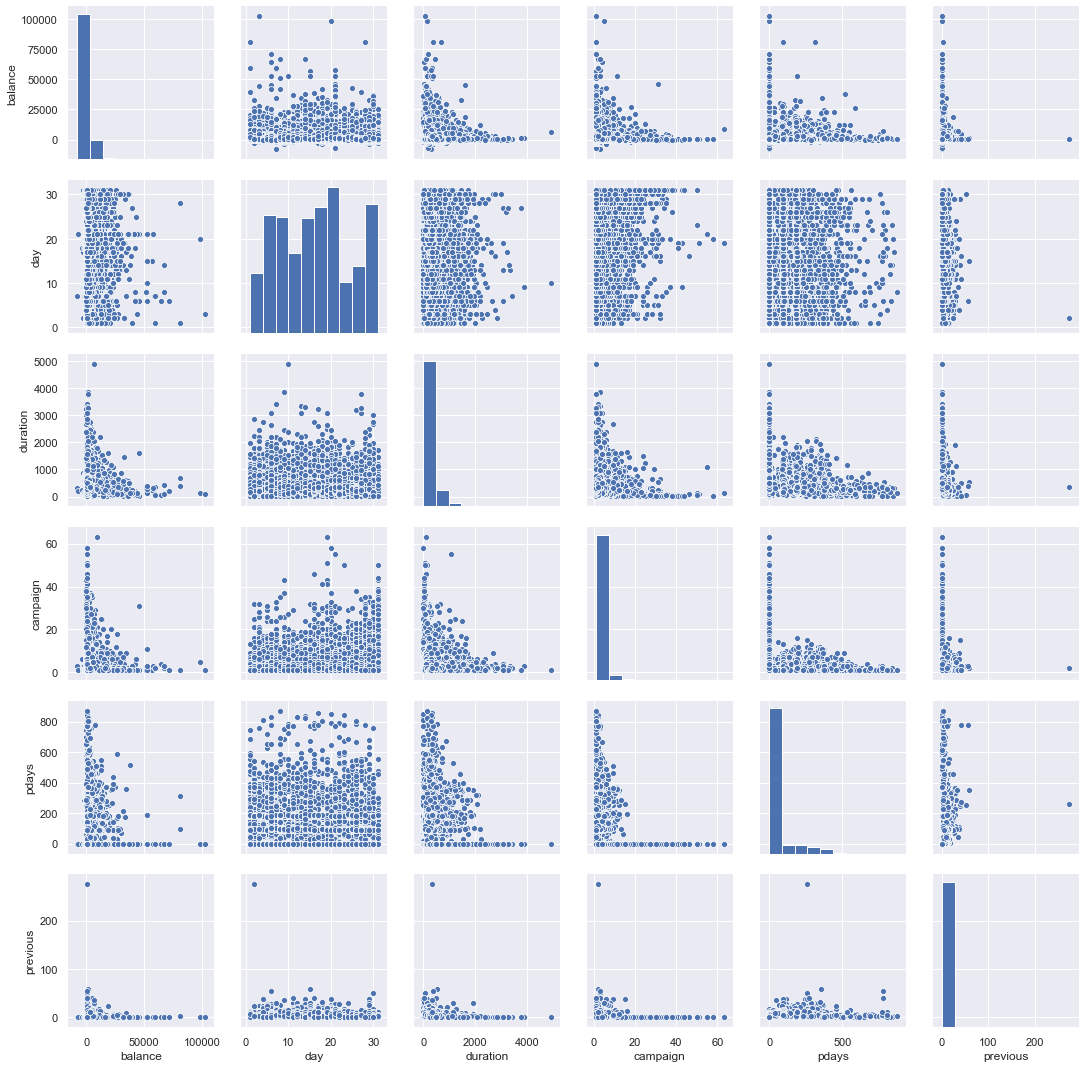

In [169]:
#Multivariate analysis
# Check the relation between each columns
sns.pairplot(bank_df.iloc[:,1:])

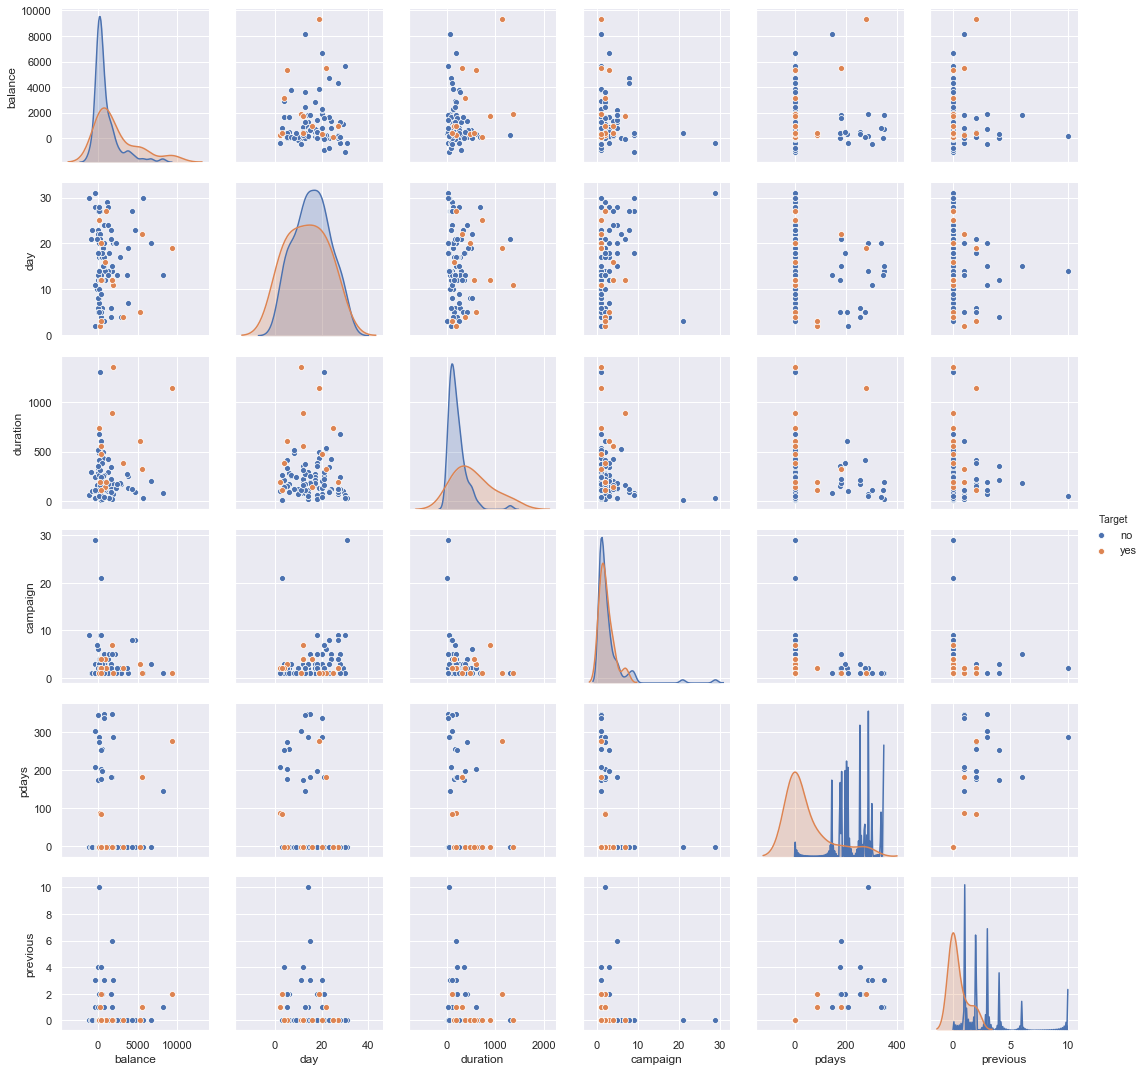

In [34]:
#Check the correlation w.r.t Target
sns.pairplot(bank_df.iloc[:,1:].sample(100),diag_kind='kde', hue="Target")

#balance, campaign and duration have positive correlation
#shorter duration has yielded better returns

In [35]:
#Data Cleaning
bank_df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [36]:
bank_df.education.replace('illiterate', np.NaN, inplace=True)
bank_df = bank_df.drop(['day','default'], axis=1)

In [37]:
bank_df = bank_df.replace('unknown', np.NaN)

In [38]:
bank_df.isnull().sum()/len(bank_df)*100

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
Target        0.000000
dtype: float64

In [122]:
#We can impute nulls with using other techniquies like KNN Imputation, etc but here, we can bear with loss of 7% of data.

bank_df.dropna(subset=['housing','job', 'education', 'marital', 'loan'], inplace=True)

In [123]:
bank_df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [124]:
bank_df.loc[bank_df['month'].isin(['apr', 'may', 'jun', 'jul', 'aug']), 'season'] = 'summer'
bank_df.loc[bank_df['month'].isin(['oct', 'nov',]), 'season'] = 'winter'
bank_df.loc[~bank_df['month'].isin(['oct', 'nov', 'apr', 'may', 'jun', 'jul', 'aug']), 'season'] = 'thirdseason'
bank_df['season'].value_counts()

summer         35181
thirdseason     5322
winter          4708
Name: season, dtype: int64

In [125]:
nums = bank_df.select_dtypes(['int64', 'float64'])

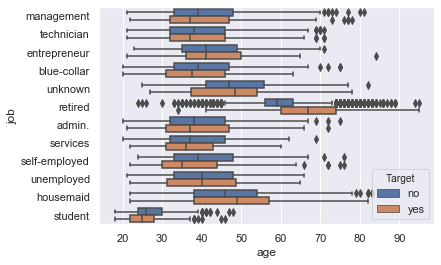

In [126]:
# Here the target column is Target
sns.boxplot(x='age',y='job',hue='Target', data=bank_df)

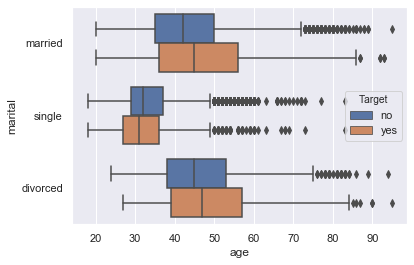

In [127]:
sns.boxplot(x='age',y='marital',hue='Target',data=bank_df)

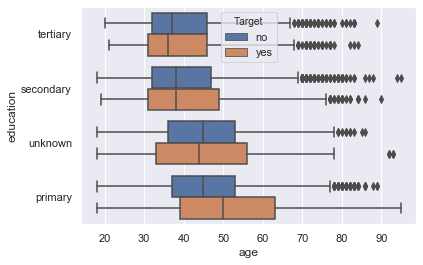

In [128]:
sns.boxplot(x='age',y='education',hue='Target',data=bank_df)

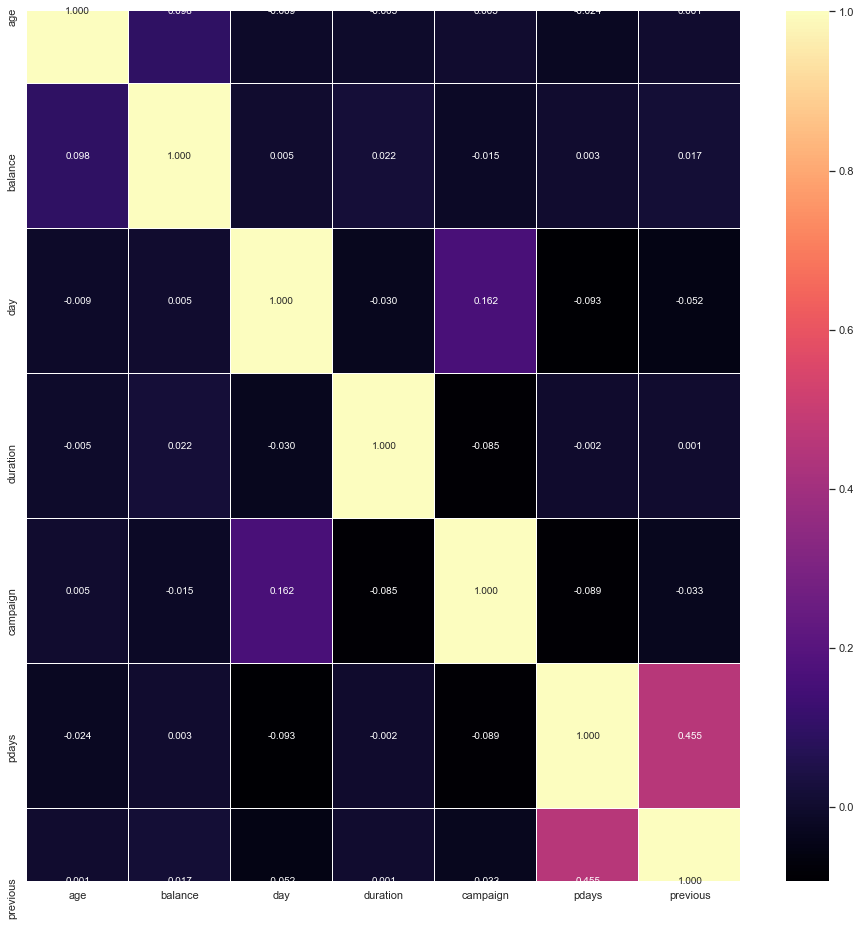

In [135]:
fig,ax = plt.subplots(figsize=(16, 16))   
sns.heatmap(bank_df.corr(), ax=ax, annot=True, linewidths=0.06, fmt= '.3f',cmap="magma")  
plt.show()

#previous contact was better than current campaign
#balance has a positive correlation with most of the variables

#Deliverable – 2 (Prepare the data for analytics) – (10)
1. Load the data into a data-frame. The data-frame should have data and column description.
2. Ensure the attribute types are correct. If not, take appropriate actions.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ration of 70:30

In [5]:
bank_df = pd.read_csv("bank-full.csv")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank_df.corr() 

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [7]:
#Also, from the data dictionary; "duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model."
#So, we'll drop the duration as well

bank_df = bank_df.drop('duration', axis=1)

In [8]:
#Chi-Square test for testing collinearity in categorical data, to see, what features are important, what has minimum p-value

class ChiSquare:
    def __init__(self, dataframe):
        self.bank_df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.bank_dfObserved = None
        self.bank_dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result=f"{colX} is IMPORTANT for Prediction with p-value = {self.p}"
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.bank_df[colX].astype(str)
        Y = self.bank_df[colY].astype(str)
        
        self.bank_dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.bank_dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.bank_dfExpected = pd.DataFrame(expected, columns=self.bank_dfObserved.columns, index = self.bank_dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [9]:
objs = bank_df.select_dtypes('object'); objs.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [10]:
cst = ChiSquare(objs)
testColumns = objs.drop('Target', axis=1)
for col in testColumns:
    cst.TestIndependence(colX=col, colY='Target')

job is IMPORTANT for Prediction with p-value = 3.337121944935502e-172
marital is IMPORTANT for Prediction with p-value = 2.1450999986791486e-43
education is IMPORTANT for Prediction with p-value = 1.6266562124072994e-51
default is IMPORTANT for Prediction with p-value = 2.4538606753508344e-06
housing is IMPORTANT for Prediction with p-value = 2.918797605076633e-192
loan is IMPORTANT for Prediction with p-value = 1.665061163492756e-47
contact is IMPORTANT for Prediction with p-value = 1.251738325340495e-225
month is IMPORTANT for Prediction with p-value = 0.0
poutcome is IMPORTANT for Prediction with p-value = 0.0


In [11]:
df_dummies= pd.get_dummies(bank_df, prefix='Edu', columns=['education']) #This function does One-Hot-Encoding on categorical text

In [12]:
df_dummies.head()

,age,job,marital,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target,Edu_primary,Edu_secondary,Edu_tertiary,Edu_unknown
0,58,management,married,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no,0,0,1,0
1,44,technician,single,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no,0,1,0,0
2,33,entrepreneur,married,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no,0,1,0,0
3,47,blue-collar,married,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no,0,0,0,1
4,33,unknown,single,no,1,no,no,unknown,5,may,1,-1,0,unknown,no,0,0,0,1


In [13]:
for feature in df_dummies.columns: # Loop through all columns in the dataframe
    if df_dummies[feature].dtype == 'object': # Only apply for columns with categorical strings
        df_dummies[feature] = pd.Categorical(df_dummies[feature]) # Replace strings with an integer
df_dummies.head(10)

,age,job,marital,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target,Edu_primary,Edu_secondary,Edu_tertiary,Edu_unknown
0,58,management,married,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no,0,0,1,0
1,44,technician,single,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no,0,1,0,0
2,33,entrepreneur,married,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no,0,1,0,0
3,47,blue-collar,married,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no,0,0,0,1
4,33,unknown,single,no,1,no,no,unknown,5,may,1,-1,0,unknown,no,0,0,0,1
5,35,management,married,no,231,yes,no,unknown,5,may,1,-1,0,unknown,no,0,0,1,0
6,28,management,single,no,447,yes,yes,unknown,5,may,1,-1,0,unknown,no,0,0,1,0
7,42,entrepreneur,divorced,yes,2,yes,no,unknown,5,may,1,-1,0,unknown,no,0,0,1,0
8,58,retired,married,no,121,yes,no,unknown,5,may,1,-1,0,unknown,no,1,0,0,0
9,43,technician,single,no,593,yes,no,unknown,5,may,1,-1,0,unknown,no,0,1,0,0


In [14]:
df_dummies.dtypes

age                 int64
job              category
marital          category
default          category
balance             int64
housing          category
loan             category
contact          category
day                 int64
month            category
campaign            int64
pdays               int64
previous            int64
poutcome         category
Target           category
Edu_primary         uint8
Edu_secondary       uint8
Edu_tertiary        uint8
Edu_unknown         uint8
dtype: object

In [15]:
print(df_dummies.age.value_counts())
print(df_dummies.job.value_counts())
print(df_dummies.marital.value_counts())
print(df_dummies.default.value_counts())
print(df_dummies.balance.value_counts())
print(df_dummies.housing.value_counts())
print(df_dummies.loan.value_counts())
print(df_dummies.contact.value_counts())
print(df_dummies.day.value_counts())
print(df_dummies.month.value_counts())
print(df_dummies.duration.value_counts())
print(df_dummies.campaign.value_counts())
print(df_dummies.pdays.value_counts())
print(df_dummies.previous.value_counts())
print(df_dummies.poutcome.value_counts())
print(df_dummies.Target.value_counts())
#print(df_dummies.season.value_counts())
print(df_dummies.Edu_primary.value_counts())
print(df_dummies.Edu_secondary.value_counts())
print(df_dummies.Edu_tertiary.value_counts())
print(df_dummies.Edu_unknown.value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
20    2752
18    2308
21    2026


AttributeError: 'DataFrame' object has no attribute 'duration'

In [16]:
replaceStruct = {
                 "marital":  {"single": 1, "married":2 , "divorced": 3},
                 "default":  {"no": 1, "yes": 2},
                 "housing":  {"yes": 1, "no": 2},
                "loan":      {"yes": 1, "no": 2},
                "contact":   {"cellular": 1, "telephone": 2, "unknown": -1}, 
                "poutcome":  {"success": 1, "failure": 2, "other": 3, "unknown": -1}, 
                "season":    {"summer": 1, "winter": 2, "thirdseason": 3},
                "Target":    {"yes": 1, "no": 2},  
                }
oneHotCols=["job","month"]

In [17]:
df_dummies=df_dummies.replace(replaceStruct)
df_dummies=pd.get_dummies(df_dummies, columns=oneHotCols)
df_dummies.head(10)

,age,marital,default,balance,housing,loan,contact,day,campaign,pdays,previous,poutcome,Target,Edu_primary,Edu_secondary,Edu_tertiary,Edu_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2,1,2143,1,2,-1,5,1,-1,0,-1,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,1,1,29,1,2,-1,5,1,-1,0,-1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,2,1,2,1,1,-1,5,1,-1,0,-1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47,2,1,1506,1,2,-1,5,1,-1,0,-1,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33,1,1,1,2,2,-1,5,1,-1,0,-1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,35,2,1,231,1,2,-1,5,1,-1,0,-1,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,28,1,1,447,1,1,-1,5,1,-1,0,-1,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,42,3,2,2,1,2,-1,5,1,-1,0,-1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,58,2,1,121,1,2,-1,5,1,-1,0,-1,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,43,1,1,593,1,2,-1,5,1,-1,0,-1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
age                  45211 non-null int64
marital              45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
contact              45211 non-null int64
day                  45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
poutcome             45211 non-null int64
Target               45211 non-null int64
Edu_primary          45211 non-null uint8
Edu_secondary        45211 non-null uint8
Edu_tertiary         45211 non-null uint8
Edu_unknown          45211 non-null uint8
job_admin.           45211 non-null uint8
job_blue-collar      45211 non-null uint8
job_entrepreneur     45211 non-null uint8
job_housemaid        45211 non-null uint8
job_manag

In [19]:
X = df_dummies.drop("default" , axis=1)
y = df_dummies.pop("default")

In [20]:
X_train, X_test, y_train, y_test =  train_test_split(df_dummies.drop('Target', axis=1), df_dummies['Target'], stratify=df_dummies['Target'], test_size=0.2, random_state=42)

#Deliverable – 3 (create the ensemble model) – (20)
1. Write python code using scikitlearn, pandas, numpy and others in Jupyter notebook to train and test the ensemble model.
2. First create a model using standard classification algorithm. Note the model performance.
3. Use appropriate algorithms and explain why that algorithm in the comment lines.
4. Evaluate the model. Use confusion matrix to evaluate class level metrics i.e..Precision and recall. Also reflect the overall score of the model.
5. Advantages and disadvantages of the algorithm.
6. Build the ensemble models and compare the results with the base model. Note: Random forest can be used only with Decision trees.

In [79]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [80]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8306977772862988


In [81]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [82]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))


system command returning error: 1


In [83]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8927781464277814
0.8933982085591065


In [84]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))



system command returning error: 1


In [85]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                        Imp
age                0.100522
marital            0.000000
balance            0.000000
housing            0.078958
loan               0.000000
contact            0.004555
day                0.000000
campaign           0.000000
pdays              0.213699
previous           0.000000
poutcome           0.516485
Edu_primary        0.000000
Edu_secondary      0.000000
Edu_tertiary       0.000000
Edu_unknown        0.000000
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
job_unknown        0.000000
month_apr          0.000000
month_aug          0.000000
month_dec          0.000000
month_feb          0.000000
month_jan          0.000000
month_jul          0.000000
month_jun          0.000000
month_mar          0

0.8933982085591065


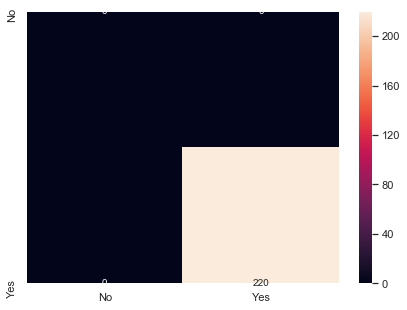

In [86]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [88]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


0.8947252018135574


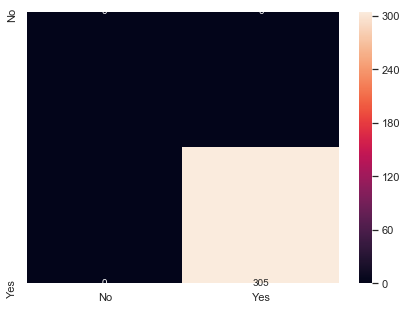

In [89]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [90]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


0.885104500718788


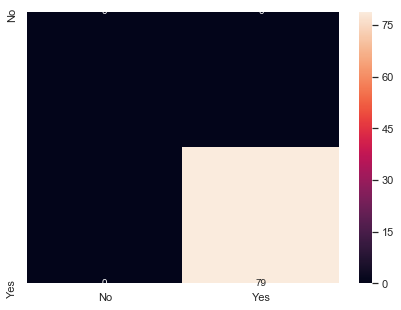

In [91]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [94]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


0.894061705186332


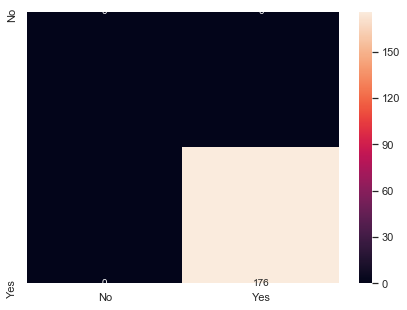

In [95]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [96]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


0.8942828707287405


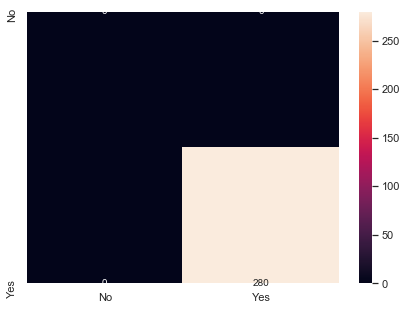

In [97]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [98]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.8963839433816212

In [99]:
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)

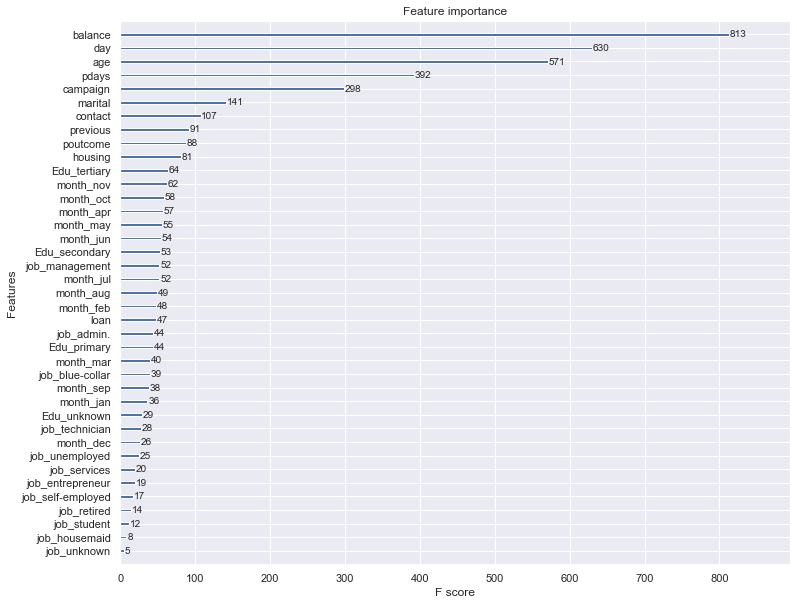

In [100]:
from xgboost import plot_importance
fig , ax = plt.subplots(1,1,figsize=(12,10))
plot_importance(xgb, ax=ax)

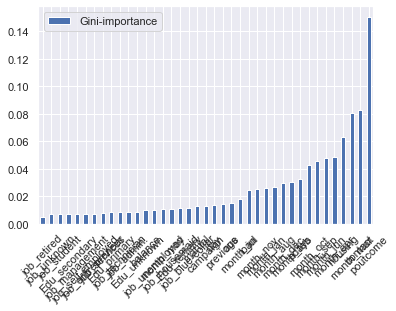

In [102]:
feats = {}
for feature, importance in zip(X_train.columns, xgb.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [103]:
from sklearn.metrics import confusion_matrix, classification_report

print('\n', classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           1       0.66      0.23      0.34      1058
           2       0.91      0.98      0.94      7985

    accuracy                           0.90      9043
   macro avg       0.79      0.61      0.64      9043
weighted avg       0.88      0.90      0.87      9043



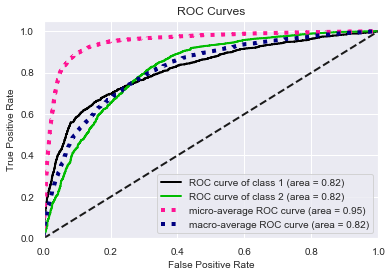

In [105]:
skplt.metrics.plot_roc_curve(y_test, y_proba)

In [106]:
#Dealing with imbalanced datasets
bank_df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [107]:
#We can infer that data is imbalanced so we can do either upsampling or downsampling so here we are going with resampling method.
from sklearn.utils import resample

bank_poutcome_unknown = bank_df[bank_df.poutcome == 'unknown'] 
bank_poutcome_failure = bank_df[bank_df.poutcome == 'failure'] 
bank_poutcome_other = bank_df[bank_df.poutcome == 'other'] 
bank_poutcome_success = bank_df[bank_df.poutcome == 'success'] 

##Upsample the yes-subscribed cases
df_minority_upsampled = resample(bank_poutcome_success, replace=True,     # sample with replacement 
                                 n_samples=2000) 

new_bank_df = pd.concat([bank_poutcome_failure, df_minority_upsampled])

In [108]:
from sklearn.utils import shuffle 

new_bank_df = shuffle(new_bank_df)

In [109]:
# Assigning list of all column names in the DataFrame 
X_features = list( new_bank_df.columns ) 
# Remove the response variable from the list 
X_features.remove( 'poutcome' ) 
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'Target']

In [110]:
## get_dummies() will convert all the columns with data type as objects 

encoded_bank_df = pd.get_dummies( new_bank_df[X_features], drop_first = True ) 
X = encoded_bank_df

In [111]:
# Encoding the subscribed column and assigning to Y 

Y = new_bank_df.poutcome.map( lambda x: int( x == 'success') )

In [112]:
#We can infer that through get dummies we convert all data type as objects and taking subscribers and non-subscribers for term deposit to predict the model
#We are splitting the model as train and test data with 70-30 ratio

from sklearn.model_selection import train_test_split 
train_X, test_X, train_y, test_y = train_test_split( X, Y, test_size = 0.3, random_state = 42)

In [113]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression 

logit = LogisticRegression()
logit.fit( train_X, train_y) 
pred_y = logit.predict(test_X)

In [114]:
from sklearn import metrics 

def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    
    sns.heatmap(cm, annot=True,  fmt='.2f',  
                xticklabels = ["Success", "Failure"], 
                yticklabels = ["Success", "Failure"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

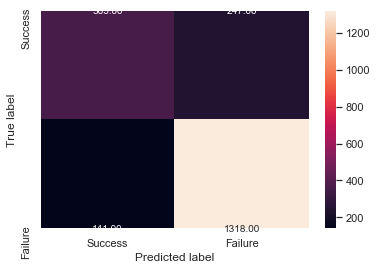

In [115]:
cm = draw_cm(test_y, pred_y )
cm

In [116]:
#From the above confusion matrix there are few true positives and a large number of false negatives.Our objective is to build high true positives
print( metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1459
           1       0.72      0.60      0.65       612

    accuracy                           0.81      2071
   macro avg       0.78      0.75      0.76      2071
weighted avg       0.81      0.81      0.81      2071



In [117]:
#ROC AUC Score
## Predicting the probability values for test cases 

predict_proba_df = pd.DataFrame(logit.predict_proba(test_X)) 
predict_proba_df.head()

,0,1
0,0.217370,0.782630
1,0.213036,0.786964
2,0.568857,0.431143
3,0.935010,0.064990
4,0.296918,0.703082


In [118]:
## Initializing the DataFrame with actual class lables 
test_results_df = pd.DataFrame( { 'actual': test_y } ) 
test_results_df = test_results_df.reset_index()

## Assigning the probability values for class label 1 
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]

In [119]:
test_results_df.head(5)

,index,actual,chd_1
0,41936,0,0.782630
1,44183,0,0.786964
2,39770,1,0.431143
3,31735,0,0.064990
4,42292,0,0.703082


In [120]:
# Passing actual class labels and the predicted probability values to compute RO C AUC score.

auc_score = metrics.roc_auc_score(test_results_df.actual, test_results_df.chd_1)
auc_score

0.8584075851039525

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual, 
                                          test_results_df.chd_1, drop_intermediate = False )

In [122]:
def draw_roc_curve( model, test_X, test_y ):
    test_results_df = pd.DataFrame( { 'actual':  test_y } )    
    test_results_df = test_results_df.reset_index() 
    
    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2] 
    
    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual, test_results_df.chd_1, 
                                             drop_intermediate = False ) 
    
    auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1)
    
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05]) 
    
    
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')   
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")    
    plt.show() 
    
    return auc_score, fpr, tpr, thresholds

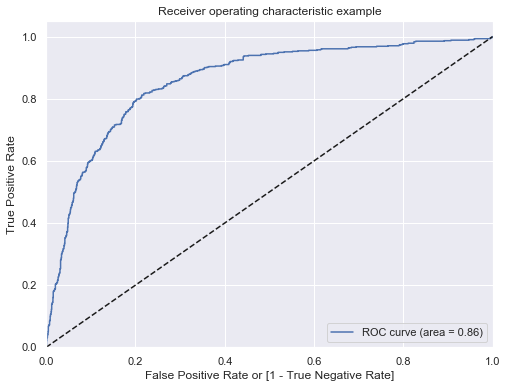

In [123]:
## Invoking draw_roc_curve with the logistic regresson model 
_, _, _, _ = draw_roc_curve( logit, test_X, test_y )

In [124]:
#We can infer from the logistic regression model its not a good model to predict the subscribers.
#K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier 

knn_clf = KNeighborsClassifier()
knn_clf.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

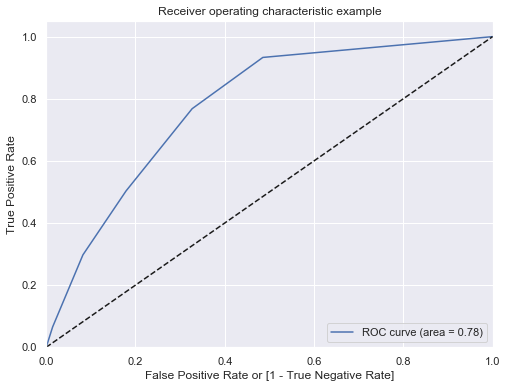

In [125]:
_, _, _, _ = draw_roc_curve( knn_clf, test_X, test_y )

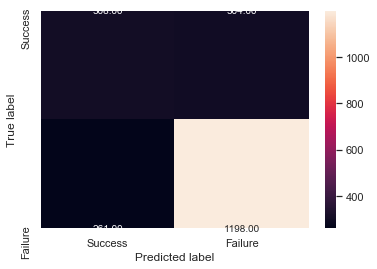

In [126]:
#AUC score of KNN is 0.78 is worse than logistic regression model at 0.86
pred_y = knn_clf.predict(test_X) 

draw_cm( test_y, pred_y)

In [127]:
print( metrics.classification_report( test_y, pred_y ))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1459
           1       0.54      0.50      0.52       612

    accuracy                           0.73      2071
   macro avg       0.67      0.66      0.67      2071
weighted avg       0.72      0.73      0.72      2071



In [128]:
#GridSerach for most optimal parameters
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'n_neighbors': range(5,10),  
                     'metric': ['canberra', 'euclidean', 'minkowski']}] 
clf = GridSearchCV(KNeighborsClassifier(), 
                   tuned_parameters, cv=10, scoring='roc_auc')

In [129]:
clf.fit(train_X, train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [130]:
clf.best_score_

0.8472352208731606

In [131]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 7}

In [132]:
#We can infer that after Gridsearch with 10 fold validation result slightly improved and it taken neighbors as 5 and metric as canberra

#Ensemble methods
#Random Forest

from sklearn.ensemble import RandomForestClassifier 

radm_clf = RandomForestClassifier( max_depth=10, n_estimators=10)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

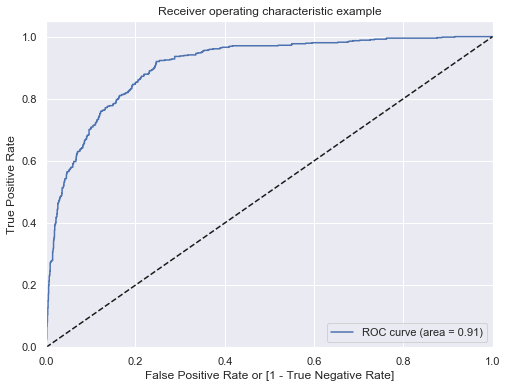

In [133]:
_, _, _, _ = draw_roc_curve( radm_clf, test_X, test_y )

In [134]:
#AUC score increased to 0.91 more than logistic and KNN models.
#GridSearch for most optimal parameters

tuned_parameters = [{'max_depth': [10, 15], 
                     'n_estimators': [10,20], 
                     'max_features': ['sqrt', 'auto']}] 
radm_clf = RandomForestClassifier() 

clf = GridSearchCV(radm_clf, tuned_parameters, cv=5, scoring='roc_auc') 
clf.fit(train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [135]:
clf.best_score_

0.920889068301166

In [136]:
clf.best_params_

{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 20}

In [137]:
#Building the ﬁnal model with optimal parameter values

radm_clf = RandomForestClassifier( max_depth=15, n_estimators=20, max_features = 'auto') 

radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

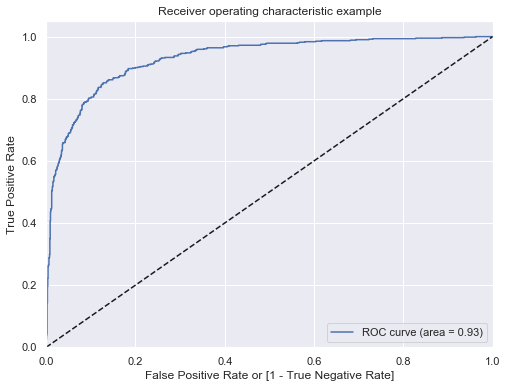

In [138]:
_, _, _, _ = draw_roc_curve( clf, test_X, test_y )

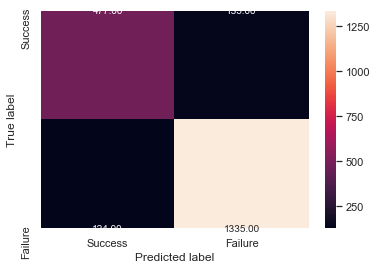

In [139]:
#From above we can infer AUC score 0.93 which is better than KNN and logistic regression

pred_y = radm_clf.predict( test_X )
draw_cm( test_y, pred_y )

In [140]:
#From confusion matrix we can infer that only 124 are false positive cases.

print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1459
           1       0.79      0.78      0.79       612

    accuracy                           0.87      2071
   macro avg       0.85      0.85      0.85      2071
weighted avg       0.87      0.87      0.87      2071



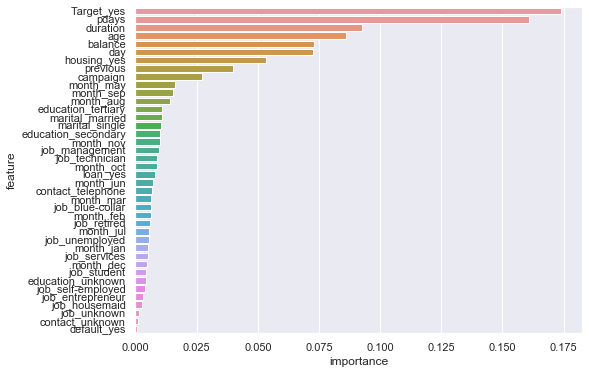

In [141]:
#Finding important features

feature_rank = pd.DataFrame( { 'feature': train_X.columns, 'importance': radm_clf.feature_importances_ } ) 

feature_rank = feature_rank.sort_values('importance', ascending = False) 
plt.figure(figsize=(8, 6)) 

sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [142]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100 
feature_rank.head(10)

,feature,importance,cumsum
39,Target_yes,0.173778,17.377835
5,pdays,0.160886,33.466472
3,duration,0.092788,42.745281
0,age,0.086136,51.358872
1,balance,0.073090,58.667865
2,day,0.072725,65.940397
24,housing_yes,0.053491,71.289514
6,previous,0.040048,75.294280
4,campaign,0.027017,77.995969
35,month_may,0.016267,79.622664


In [143]:
#Top 5 features are balance,age,previous campaign,current campaign and housing loan-yes and these features will give 75% information of the data

#Boosting
#1-Adaboost

from sklearn.ensemble import AdaBoostClassifier 

logreg_clf = LogisticRegression() 
ada_clf = AdaBoostClassifier(logreg_clf, n_estimators=50) 

ada_clf.fit(train_X, train_y )

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

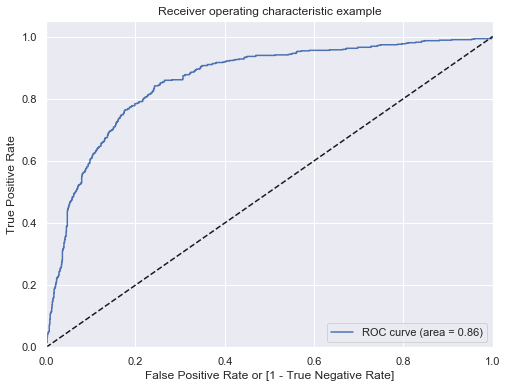

In [144]:
_, _, _, _ = draw_roc_curve( ada_clf, test_X, test_y )

In [145]:
#Here AUC score is 0.86

#2-Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10) 
gboost_clf.fit(train_X, train_y )

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

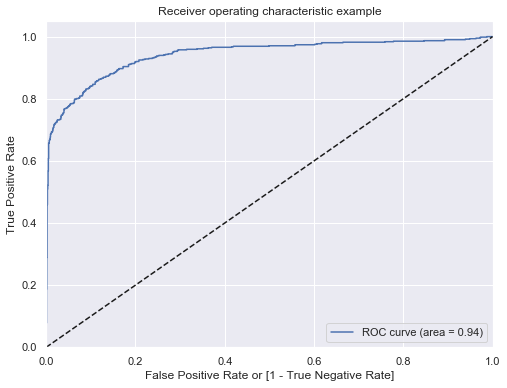

In [146]:
_, _, _, _ = draw_roc_curve( gboost_clf, test_X, test_y )

In [147]:
#The AUC score is 0.94 which best among all models,we will check through different cross validation

from sklearn.model_selection import cross_val_score 

gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10) 
cv_scores = cross_val_score( gboost_clf, train_X, train_y, cv = 10, scoring = 'roc_auc' )

In [148]:
print( cv_scores )
print( "Mean Accuracy: ", np.mean(cv_scores), " with standard deviation of: ",  np.std(cv_scores))

[0.95001564 0.92027943 0.93583738 0.9505814  0.92973063 0.95258909
 0.91481931 0.9335578  0.929727   0.92271234]
Mean Accuracy:  0.9339850010790155  with standard deviation of:  0.012651550907474664


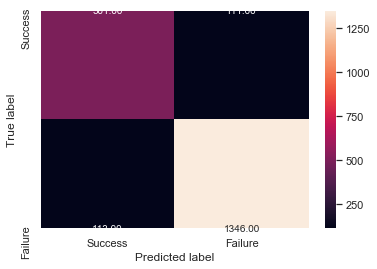

In [149]:
#We can infer that mean accuacy of 93.39% and standard deviation of only 0.01%.So we can infer that this is robust model.

gboost_clf.fit(train_X, train_y ) 
pred_y = gboost_clf.predict( test_X ) 
draw_cm( test_y, pred_y )

In [150]:
#We can infer that False positive is only 113 and false negative are 117.

print( metrics.classification_report( test_y, pred_y ))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1459
           1       0.82      0.82      0.82       612

    accuracy                           0.89      2071
   macro avg       0.87      0.87      0.87      2071
weighted avg       0.89      0.89      0.89      2071



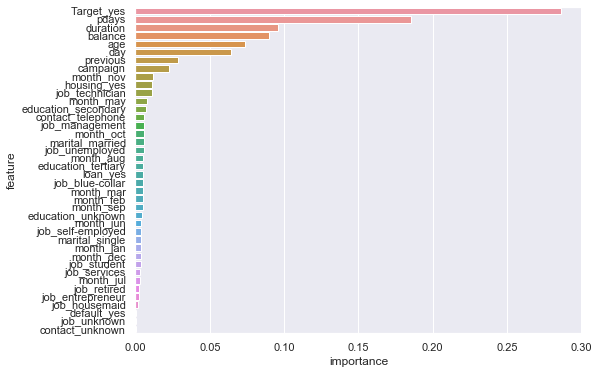

In [151]:
feature_rank = pd.DataFrame( { 'feature': train_X.columns, 'importance': gboost_clf.feature_importances_ } )

feature_rank = feature_rank.sort_values('importance', ascending = False) 
plt.figure(figsize=(8, 6)) 
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [152]:
#Conclusion
#Gradient Boosting also selected the features balance,age and current_campaign as top features which have maximum information about whether a customer will subscribe or not subscribe to the term deposits.